**1 .set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.**

In [2]:
import pandas as pd
diabetes_data = pd.read_csv("/content/diabetes.csv")

In [3]:
import numpy as np
# Set a seed for reproducibility
np.random.seed(42)

In [4]:
# Take a random sample of 25 observations
sample = diabetes_data.sample(n=25)

In [5]:
# Calculate mean and highest Glucose values for both sample and population
population_mean_glucose = diabetes_data['Glucose'].mean()
population_max_glucose = diabetes_data['Glucose'].max()

sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

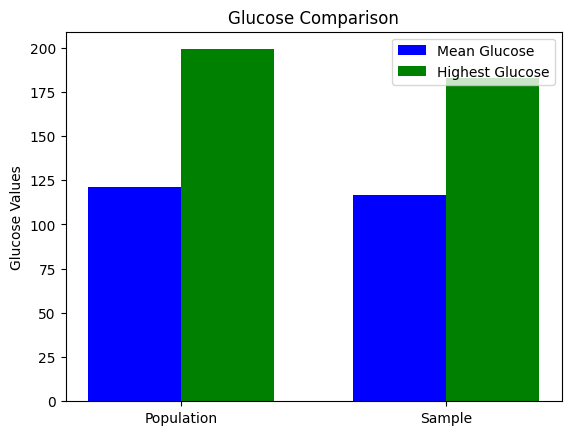

In [7]:
import matplotlib.pyplot as plt
# Create a grouped bar chart to compare mean and highest Glucose values
labels = ['Population', 'Sample']
mean_glucose_values = [population_mean_glucose, sample_mean_glucose]
max_glucose_values = [population_max_glucose, sample_max_glucose]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mean_glucose_values, width, label='Mean Glucose', color='blue')
rects2 = ax.bar(x + width/2, max_glucose_values, width, label='Highest Glucose', color='green')

ax.set_title('Glucose Comparison')
ax.set_ylabel('Glucose Values')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

**2. Find the 98th percentile of BMI of your sample and the population and compare the results
using charts**

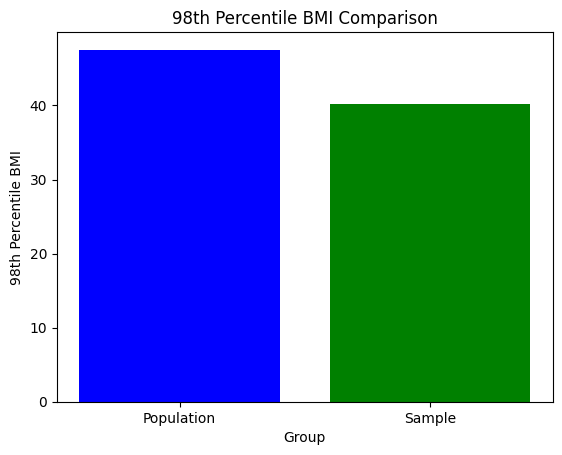

In [8]:
# Calculate the 98th percentile of BMI for both sample and population
population_98th_percentile_bmi = np.percentile(diabetes_data['BMI'], 98)
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)

# Create a bar chart to compare the 98th percentile of BMI
plt.bar(['Population', 'Sample'], [population_98th_percentile_bmi, sample_98th_percentile_bmi], color=['blue', 'green'])
plt.title('98th Percentile BMI Comparison')
plt.xlabel('Group')
plt.ylabel('98th Percentile BMI')
plt.show()

**3. Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you shouldcreate charts for this comparison. Report on your findings**

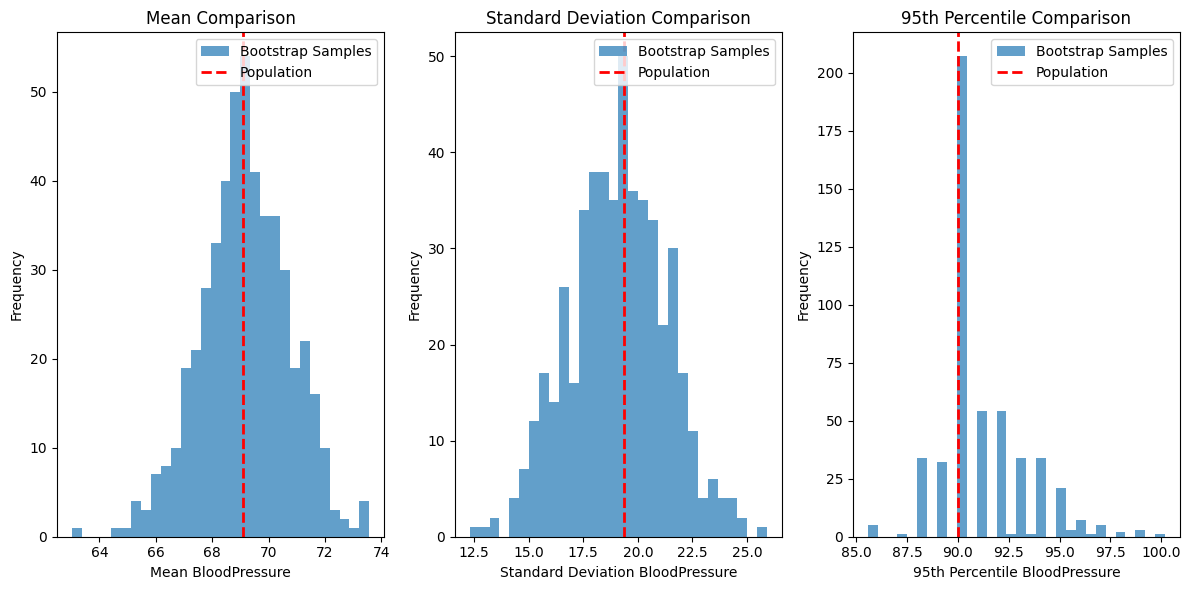

In [9]:
# Define the number of bootstrap samples and the sample size
num_bootstrap_samples = 500
sample_size = 150

# Initialize lists to store statistics from bootstrap samples
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

# Generate bootstrap samples and calculate statistics
for _ in range(num_bootstrap_samples):
    # Sample with replacement from the population
    bootstrap_sample = diabetes_data['BloodPressure'].sample(n=sample_size, replace=True)
    # Calculate mean, standard deviation, and percentile
    bootstrap_mean = bootstrap_sample.mean()
    bootstrap_std = bootstrap_sample.std()
    bootstrap_percentile = np.percentile(bootstrap_sample, 95)  # 95th percentile as an example
    # Append to lists
    bootstrap_means.append(bootstrap_mean)
    bootstrap_stds.append(bootstrap_std)
    bootstrap_percentiles.append(bootstrap_percentile)

# Calculate statistics from the population
population_mean = diabetes_data['BloodPressure'].mean()
population_std = diabetes_data['BloodPressure'].std()
population_percentile = np.percentile(diabetes_data['BloodPressure'], 95)  # 95th percentile as an example

# Create visualizations
plt.figure(figsize=(12, 6))

# Mean comparison
plt.subplot(1, 3, 1)
plt.hist(bootstrap_means, bins=30, alpha=0.7, label='Bootstrap Samples')
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population')
plt.title('Mean Comparison')
plt.xlabel('Mean BloodPressure')
plt.ylabel('Frequency')
plt.legend()

# Standard deviation comparison
plt.subplot(1, 3, 2)
plt.hist(bootstrap_stds, bins=30, alpha=0.7, label='Bootstrap Samples')
plt.axvline(population_std, color='red', linestyle='dashed', linewidth=2, label='Population')
plt.title('Standard Deviation Comparison')
plt.xlabel('Standard Deviation BloodPressure')
plt.ylabel('Frequency')
plt.legend()

# Percentile comparison
plt.subplot(1, 3, 3)
plt.hist(bootstrap_percentiles, bins=30, alpha=0.7, label='Bootstrap Samples')
plt.axvline(population_percentile, color='red', linestyle='dashed', linewidth=2, label='Population')
plt.title('95th Percentile Comparison')
plt.xlabel('95th Percentile BloodPressure')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()